In [13]:
# Dependencies
import requests
import json
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np




In [14]:
#Read in csv
disaster = "Fema_DisasterDeclarationsSummaries.csv"
disaster_df = pd.read_csv(disaster)


In [15]:
#Reformat date to take off time stamp
disaster_df['declarationDate'] = pd.to_datetime(disaster_df['declarationDate']).dt.date
disaster_df

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,hash,lastRefresh,id
0,DR-3-LA,3,LA,DR,1953-05-29,1953,Flood,FLOOD,0,1,...,1953-05-29T04:00:00.000Z,NaN,22,0,0,Statewide,53005,745948932fd77a7c6dcd4de7059ff080,2019-07-26T18:49:32.236Z,5d1bceafd5b39c032f2602c1
1,DR-8-IA,8,IA,DR,1953-06-11,1953,Flood,FLOOD,0,1,...,1953-06-11T04:00:00.000Z,NaN,19,0,0,Statewide,53008,e258e9dd25fac73939f59c8ffb5308f5,2019-07-26T18:49:32.162Z,5d1bceafd5b39c032f2602c4
2,DR-11-NH,11,NH,DR,1953-07-02,1953,Fire,FOREST FIRE,0,1,...,1953-07-02T04:00:00.000Z,NaN,33,0,0,Statewide,53011,86a70820dbb80e585cc01e2ce502005c,2019-07-26T18:49:32.163Z,5d1bceafd5b39c032f2602c5
3,DR-9-TX,9,TX,DR,1953-06-19,1953,Flood,FLOOD,0,1,...,1953-06-19T04:00:00.000Z,NaN,48,0,0,Statewide,53010,4485da27a9218458eb2d13a6c33a4c62,2019-07-26T18:49:32.164Z,5d1bceafd5b39c032f2602c6
4,DR-5-MT,5,MT,DR,1953-06-06,1953,Flood,FLOODS,0,1,...,1953-06-06T04:00:00.000Z,NaN,30,0,0,Statewide,53006,59c5483387ca13c6a3c1bc692f4860e1,2019-07-26T18:49:32.235Z,5d1bceafd5b39c032f2602c7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42115,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,0,48440,Mohegan Trust Lands,20225,e9f650f122bfd6f6aaec9fdefa5fe947,2020-08-07T04:41:59.273Z,5f2cdb975e5b5d512b5c08f3
42116,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,15,99015,Windham (County),20225,6488b4a610cd88695fedbf55787fb7e1,2020-08-07T04:41:59.277Z,5f2cdb975e5b5d512b5c08f4
42117,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,0,46000,Mashantucket Pequot Indian Reservation,20225,149a04a7bd2811bb5084dfb8d2bc513e,2020-08-07T04:41:59.279Z,5f2cdb975e5b5d512b5c08f5
42118,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,11,99011,"New London (County)(in (P)MSA 3280,5520)",20225,6ae334ae1c5a703f0632edd9291ee619,2020-08-07T04:41:59.281Z,5f2cdb975e5b5d512b5c08f6


In [16]:
#Only use date from 1998 and onward to match the other csv that will be read in later
cleaned_disaster_df = disaster_df[disaster_df["fyDeclared"]>=1998]
cleaned_disaster_df



,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,hash,lastRefresh,id
11090,DR-1190-NE,1190,NE,DR,1997-11-01,1998,Severe Storm(s),"SEVERE SNOW STORMS, RAIN, AND STRONG WINDS",0,0,...,1997-10-26T04:00:00.000Z,NaN,31,63,99063,Frontier (County),98001,72995d760fb671714979218ed450e48a,2019-07-26T18:49:43.622Z,5d1bceb9d5b39c032f26383d
11096,DR-1190-NE,1190,NE,DR,1997-11-01,1998,Severe Storm(s),"SEVERE SNOW STORMS, RAIN, AND STRONG WINDS",0,0,...,1997-10-26T04:00:00.000Z,NaN,31,79,99079,Hall (County),98001,ac5d4d930024447277bfb9953f754eb3,2019-07-26T18:49:43.626Z,5d1bceb9d5b39c032f263843
11144,DR-1190-NE,1190,NE,DR,1997-11-01,1998,Severe Storm(s),"SEVERE SNOW STORMS, RAIN, AND STRONG WINDS",0,0,...,1997-10-26T04:00:00.000Z,NaN,31,153,99153,Sarpy (County),98001,f3694bd0ae32f2e9d70621dc606203fa,2019-07-26T18:49:43.676Z,5d1bceb9d5b39c032f263873
11145,DR-1190-NE,1190,NE,DR,1997-11-01,1998,Severe Storm(s),"SEVERE SNOW STORMS, RAIN, AND STRONG WINDS",0,0,...,1997-10-26T04:00:00.000Z,NaN,31,185,99185,York (County),98001,98d4e4d7cd926c967fc748d6130e9faf,2019-07-26T18:49:43.677Z,5d1bceb9d5b39c032f263877
11146,DR-1190-NE,1190,NE,DR,1997-11-01,1998,Severe Storm(s),"SEVERE SNOW STORMS, RAIN, AND STRONG WINDS",0,0,...,1997-10-26T04:00:00.000Z,NaN,31,131,99131,Otoe (County),98001,04106104304928e1142bf07303ce59f3,2019-07-26T18:49:43.627Z,5d1bceb9d5b39c032f263878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42115,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,0,48440,Mohegan Trust Lands,20225,e9f650f122bfd6f6aaec9fdefa5fe947,2020-08-07T04:41:59.273Z,5f2cdb975e5b5d512b5c08f3
42116,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,15,99015,Windham (County),20225,6488b4a610cd88695fedbf55787fb7e1,2020-08-07T04:41:59.277Z,5f2cdb975e5b5d512b5c08f4
42117,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,0,46000,Mashantucket Pequot Indian Reservation,20225,149a04a7bd2811bb5084dfb8d2bc513e,2020-08-07T04:41:59.279Z,5f2cdb975e5b5d512b5c08f5
42118,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,11,99011,"New London (County)(in (P)MSA 3280,5520)",20225,6ae334ae1c5a703f0632edd9291ee619,2020-08-07T04:41:59.281Z,5f2cdb975e5b5d512b5c08f6


In [17]:
#Groupby to find how many instances of the top 5 natural disaster in the US from 1998 - 2020
Storm_Type = cleaned_disaster_df[["state", "incidentType"]]
Storm_Type
Storm_count = Storm_Type.groupby("incidentType").count()
Storm_count

,state
incidentType,
Earthquake,184
Fire,3014
Flood,3297
Hurricane,10100
Severe Storm(s),14029


In [31]:
#Create variables to be used in pie chart
Storm_amounts = Storm_count["state"]
Storm_amounts

incidentType
Earthquake           184
Fire                3014
Flood               3297
Hurricane          10100
Severe Storm(s)    14029
Name: state, dtype: int64

In [32]:
Labels = ["Earthquake", "Fire", "Flood","Hurricane", "Severe Storm(s)"]

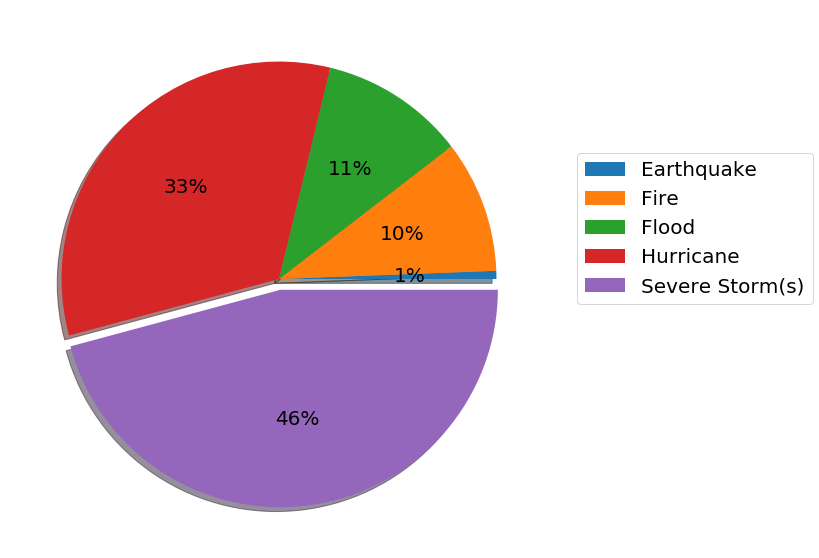

In [33]:
#Pie Chart
fig = plt.figure(figsize=[10, 10])
explode = (0, 0, 0, 0, .05)

plt.pie(Storm_amounts, explode=explode, autopct= "%1.0f%%", shadow=True, startangle=0)
plt.legend(Labels, loc="upper right",bbox_to_anchor=(1.5, 0.75))
plt.rcParams["font.size"] = 20
plt.savefig("Pie Chart Top 5 Disasters")

